# Nevanlinna

In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.size": 16,
    'text.latex.preamble': r"\usepackage{amsmath}"
})

In [3]:
import irbasis3

## Generate IR basis by singular value expansion

In [4]:
# Create kenerl for lambda_ = 100 and beta = 10
# The default value of eps ``cutoff for singular values" is
# set to 2.2e-16.
# In this sample, we compute fewer basis functions.
lambda_ = 100
beta = 10
wmax = lambda_/beta
K = irbasis3.KernelFFlat(lambda_=100)
basis = irbasis3.FiniteTempBasis(
    K, statistics='F', beta=beta, eps=1e-10)
print(basis.size)

30


## Fitting $\rho(\omega)$

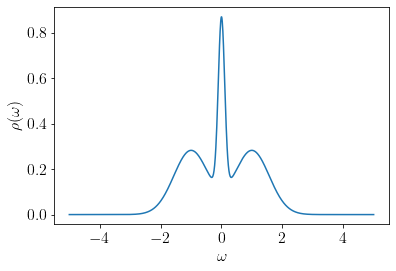

In [5]:
# Three Gaussian peaks (normalized to 1)
gaussian = lambda x, mu, sigma:\
    np.exp(-((x-mu)/sigma)**2)/(np.sqrt(np.pi)*sigma)

rho = lambda omega: 0.2*gaussian(omega, 0.0, 0.15) + \
    0.4*gaussian(omega, 1.0, 0.8) + 0.4*gaussian(omega, -1.0, 0.8)

omegas = np.linspace(-5, 5, 1000)
plt.xlabel(r'$\omega$')
plt.ylabel(r'$\rho(\omega)$')
plt.plot(omegas, rho(omegas))
#plt.tight_layout()
#plt.savefig("section7_rho_omega.pdf")

Text(0, 0.5, '$|\\rho_l|$')

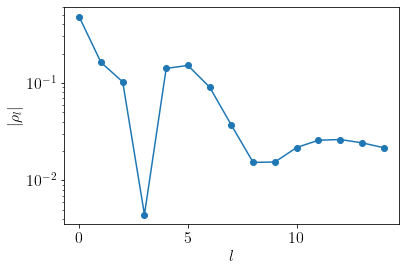

In [6]:
rhol = basis.v.overlap(rho)
plt.semilogy(np.abs(rhol[::2]), marker='o')
plt.xlabel(r'$l$')
plt.ylabel(r'$|\rho_l|$')

Text(0, 0.5, '$|g_l|$')

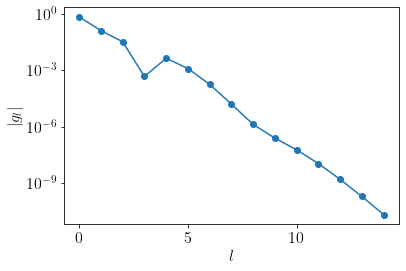

In [7]:
gl = -basis.s * rhol
plt.semilogy(np.abs(gl[::2]), marker='o')
plt.xlabel(r'$l$')
plt.ylabel(r'$|g_l|$')

## From IR to $\tau$

In [8]:
def eval_gtau(taus):
    uval = basis.u(taus)
    return uval.T @ gl

Text(0, 0.5, '$G(\\tau)$')

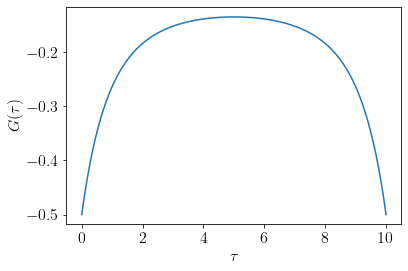

In [9]:
taus = np.linspace(0, beta, 1000)
uval = basis.u(taus)
gtaus = uval.T @ gl
plt.plot(taus, gtaus)
plt.xlabel(r'$\tau$')
plt.ylabel(r'$G(\tau)$')

In [13]:
def eval_giv(v):
    uhat_val = basis.uhat(v)
    return uhat_val.T @ gl

smpl_matsu = irbasis3.MatsubaraSampling(basis)
v = smpl_matsu.sampling_points
giv = eval_giv(v)

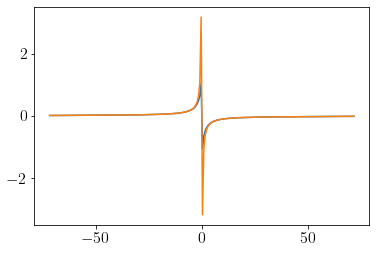

In [16]:
plt.plot(v*np.pi/beta, giv.imag)
x = v*np.pi/beta
plt.plot(x, -1/x)

In [18]:
with open('giv.txt', 'w') as f:
    for v_, g_ in zip(v, giv):
        print(v_//2, g_.real, g_.imag, file=f)

## Reconstruct $g_l$ by numerical integration

$$
g_l = \int_0^\beta d\tau U_l(\tau) G(\tau)
$$

In [9]:
gl_reconst = basis.u.overlap(eval_gtau)

## Reconstruct $g_l$ by sparse sampling (fitting)

In [10]:
smpl = irbasis3.TauSampling(basis)
print("Sampling points: ", smpl.sampling_points)
print("Condition number: ", smpl.cond)
gl_reconst_sparse = smpl.fit(eval_gtau(smpl.sampling_points))

Sampling points:  [0.01254038 0.02508075 0.0846084  0.17969895 0.31247002 0.48595941
 0.70421951 0.97237343 1.29652855 1.68336935 2.13916506 2.66791199
 3.26855641 3.93189993 4.6387471  5.3612529  6.06810007 6.73144359
 7.33208801 7.86083494 8.31663065 8.70347145 9.02762657 9.29578049
 9.51404059 9.68752998 9.82030105 9.9153916  9.97491925 9.98745962]
Condition number:  5.89770217368647


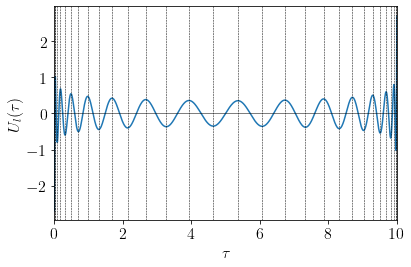

In [11]:
plt.plot(taus, basis.u[-1](taus))
plt.plot(taus, np.zeros_like(taus), ls='-', color='k', marker='', lw=0.5)
#plt.plot(smpl.sampling_points, np.full(smpl.sampling_points.size, 0.0), ls='', marker='x')
for x in smpl.sampling_points:
    plt.axvline(x=x, ls='--', lw=0.5, color='k')
plt.xlabel(r'$\tau$')
plt.ylabel(r'$U_l(\tau)$')
plt.xlim([0, beta])
plt.tight_layout()
plt.savefig('sampling_points_tau.pdf')

## Comparison

Text(0, 0.5, '$|g_l|$')

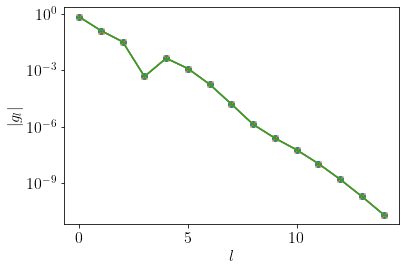

In [12]:
gl = -basis.s * rhol
plt.semilogy(np.abs(gl[::2]), marker='o')
plt.semilogy(np.abs(gl_reconst[::2]), marker='x')
plt.semilogy(np.abs(gl_reconst_sparse[::2]), marker='+')
plt.xlabel(r'$l$')
plt.ylabel(r'$|g_l|$')

In [13]:
def eval_giv(v):
    uhat_val = basis.uhat(v)
    return uhat_val.T @ gl

smpl_matsu = irbasis3.MatsubaraSampling(basis)
print("Condition number: ", smpl_matsu.cond)
#gl_reconst_sparse = smpl.fit(eval_gtau(smpl.sampling_points))

In [ ]:
#plt.plot(taus, basis.u[-1](taus))
#plt.plot(taus, np.zeros_like(taus), ls='-', color='k', marker='', lw=0.5)
#for x in smpl.sampling_points:
#    plt.axvline(x=x, ls='--', lw=0.5, color='k')
#plt.xlabel(r'$\tau$')
#plt.ylabel(r'$U_l(\tau)$')
#plt.xlim([0, beta])
#plt.tight_layout()
#plt.savefig('sampling_points_tau.pdf')